# Project 1

In [138]:
#Importing pandas as pd
import pandas as pd

#import numpy as np
import numpy as np

#Setting options to display full data frame rows
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [139]:
#Reading in bikeDetails data set using pandas
bike_data = pd.read_csv("bikeDetails.csv")

In [217]:
#Displays the first 5 observations from the bike_data data set
bike_data.head()

2020

In [224]:
# Adding
bike_data.name = bike_data.name.astype("category")
bike_data.seller_type = bike_data.seller_type.astype("category")
bike_data.owner = bike_data.owner.astype("category")
bike_data['year_cat'] = pd.cut(bike_data.year,
                               bins = [1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
                               right = False, include_lowest = True)
bike_data['year_int'] = bike_data.year - 1988 + 1

In [225]:
bike_data.dtypes

name                 category
selling_price           int64
year                    int64
seller_type          category
owner                category
km_driven               int64
ex_showroom_price     float64
year_cat             category
year_int                int64
dtype: object

## Ashley's EDA

In [226]:
bike_data['year_cat'].value_counts(dropna = False)

[2014, 2018)    431
[2010, 2014)    264
[2018, 2022)    220
[2006, 2010)    105
[2002, 2006)     23
[1998, 2002)     12
[1994, 1998)      3
[1990, 1994)      2
[1986, 1990)      1
Name: year_cat, dtype: int64

In [196]:
bike_data['seller_type'].value_counts(dropna = False)

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [144]:
bike_data['owner'].value_counts(dropna = False)

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [197]:
pd.crosstab([bike_data.seller_type, bike_data.year_cat], bike_data.owner, margins = True,
           dropna = False)

owner                     1st owner  2nd owner  3rd owner  4th owner     All
seller_type year_cat                                                        
Dealer      [1988, 1992)          0          0          0          0     NaN
            [1992, 1996)          0          0          0          0     NaN
            [1996, 2000)          0          1          0          0     1.0
            [2000, 2004)          0          0          0          0     NaN
            [2004, 2008)          0          0          0          0     NaN
            [2008, 2012)          0          1          0          0     1.0
            [2012, 2016)          2          0          0          0     2.0
            [2016, 2020)          2          0          0          0     2.0
            [2020, 2021)          0          0          0          0     NaN
Individual  [1988, 1992)          2          0          0          0     2.0
            [1992, 1996)          0          1          1          0     2.0
            [1996, 2000)          4          0          1          0     5.0
            [2000, 2004)          7          3          1          1    12.0
            [2004, 2008)         56         12          0          0    68.0
            [2008, 2012)        142         29          4          1   176.0
            [2012, 2016)        278         50          3          1   332.0
            [2016, 2020)        428         26          1          0   455.0
            [2020, 2021)          3          0          0          0     3.0
All                             924        123         11          3  1061.0

In [70]:
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,year_cat,year_int
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,"[2016, 2020)",32
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,"[2016, 2020)",30
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,"[2016, 2020)",31
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,"[2012, 2016)",28
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,"[2008, 2012)",24


In [125]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["seller_type"], aggfunc = ("min", "max", "mean", "std")).round(2)
# pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
#               index = "owner", aggfunc = ["mean", "std", "q25", "median", "q75"])

ex_showroom_price                              km_driven  \
                          max      mean      min       std       max   
seller_type                                                            
Dealer               118997.0  88536.00  61600.0  28860.41    100000   
Individual          1278000.0  87955.93  30490.0  77666.00    880000   

                                      selling_price                             
                 mean   min       std           max      mean    min       std  
seller_type                                                                     
Dealer       35258.83  5500  37470.92         80000  46666.67  15000  25734.54  
Individual   34354.72   350  51705.46        760000  59711.92   5000  56427.96

In [120]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["owner"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                                 km_driven  \
                        max       mean       min        std       max   
owner                                                                   
1st owner          752020.0   84362.80   30490.0   54520.04    646000   
2nd owner         1278000.0  112554.65   42859.0  168949.65    340000   
3rd owner           84751.0   64611.00   44493.0   20129.01     70000   
4th owner          534000.0  534000.00  534000.0        NaN    880000   

                                      selling_price                    \
                mean   min        std           max       mean    min   
owner                                                                   
1st owner   32816.58   350   45870.37        760000   60022.81   5000   
2nd owner   39288.99  3500   35886.63        750000   55666.66   6000   
3rd owner   33292.18  5000   20934.50        150000   55727.27  20000   
4th owner  311500.00  6500  492772.51        330000  118333.33  10000   

                      
                 std  
owner                 
1st owner   51542.57  
2nd owner   81671.92  
3rd owner   38385.13  
4th owner  183325.76

In [127]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["year_cat"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                              km_driven  \
                           max      mean      min       std       max   
year_cat                                                                
[1988, 1992)               NaN       NaN      NaN       NaN     35000   
[1992, 1996)               NaN       NaN      NaN       NaN     20000   
[1996, 2000)               NaN       NaN      NaN       NaN    646000   
[2000, 2004)           54852.0  54852.00  54852.0       NaN     66191   
[2004, 2008)           85011.0  59888.00  46575.0  13621.10    127000   
[2008, 2012)          589000.0  77059.20  37675.0  67452.90    880000   
[2012, 2016)         1278000.0  83894.82  42859.0  90586.41    500000   
[2016, 2020)          752020.0  95288.69  30490.0  69371.29    345000   

                                          selling_price                     \
                   mean    min        std           max       mean     min   
year_cat                                                                     
[1988, 1992)   28000.00  21000    9899.49         20000   13000.00    6000   
[1992, 1996)   15000.00  10000    7071.07        150000  140000.00  130000   
[1996, 2000)  140475.67  10000  248664.34         65000   22500.00    5000   
[2000, 2004)   39057.58   4000   20592.50         70000   22916.67    8000   
[2004, 2008)   54082.31   3500   28868.67         99000   22113.24    6000   
[2008, 2012)   56541.59   1900   87708.57        300000   32012.42    7500   
[2012, 2016)   36215.19   1200   40867.24        750000   48844.87   12000   
[2016, 2020)   20293.67    350   24234.46        760000   84301.95   18000   

                        
                   std  
year_cat                
[1988, 1992)   9899.49  
[1992, 1996)  14142.14  
[1996, 2000)  21851.77  
[2000, 2004)  20830.30  
[2004, 2008)  17297.85  
[2008, 2012)  28957.01  
[2012, 2016)  49468.32  
[2016, 2020)  61682.03

<AxesSubplot:xlabel='year'>

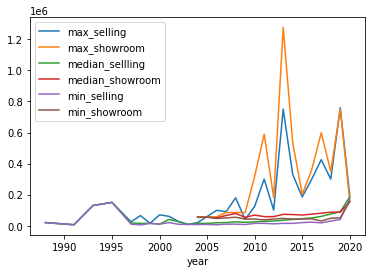

In [212]:
max_selling = bike_data.groupby("year")\
.agg(
    max_selling = ("selling_price", max), 
    max_showroom = ("ex_showroom_price", max),
    median_sellling = ("selling_price", np.median),
    median_showroom = ("ex_showroom_price", np.median),
    min_selling = ("selling_price", min), 
    min_showroom = ("ex_showroom_price", min)
)
max_selling.plot.line()

## George's EDA

In [112]:
#using the .describe() method to get a first look at the numeric variables in the dataset. Although you would not necessarily perform math on the listed years for each bike, seeing info like the average year is meaningful.
bike_data.drop(["year_int"], axis = 1).describe().round(2)

,selling_price,year,km_driven,ex_showroom_price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


In [40]:
bike_data.columns
#note: our columns are name, selling_price, year, seller_type, owner, km_driven, and ex_showroom_price

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'year_cat', 'year_int'],
      dtype='object')

In [159]:
#bike_data_numeric = bike_data['selling_price', 'km_driven', 'ex_showrooom_price']

#previously I tried to do what I was doing above exactly in the way he does it
#in the video and got the same error

#Fixed to grab desired columns from bike_data for all rows
bike_data_numeric = bike_data.loc[:, ['selling_price', 'year', 'km_driven', 'ex_showroom_price']]


In [ ]:
#finding mean and median of all the numeric variables using the .mean and .median methods
bike_data['selling_price'].mean()

59638.151743638075

In [ ]:
bike_data['selling_price'].median()

45000.0

In [ ]:
bike_data['km_driven'].mean()

34359.83317624882

In [ ]:
bike_data['km_driven'].median()

25000.0

In [ ]:
bike_data['ex_showroom_price'].mean()

87958.71405750798

In [ ]:
bike_data['ex_showroom_price'].median()

72752.5

In [ ]:
#similarly finding standard deviations of the numeric variables
bike_data.selling_price.std()

56304.29197302419

In [ ]:
bike_data.km_driven.std()

51623.15270159632

In [ ]:
bike_data.ex_showroom_price.std()

77496.5871894531

In [ ]:
#similarly finding more fine-tuned quantiles
bike_data.selling_price.quantile(q = [.05, .10, .15, .20, .25, .30, .35, .40, .45, .50,
                                      .55, .60, .65, .70, .75, .80, .85, .90, .95])

0.05     15000.0
0.10     20000.0
0.15     23000.0
0.20     25000.0
0.25     28000.0
0.30     30000.0
0.35     35000.0
0.40     38000.0
0.45     40000.0
0.50     45000.0
0.55     47000.0
0.60     50000.0
0.65     58000.0
0.70     62000.0
0.75     70000.0
0.80     80000.0
0.85    100000.0
0.90    120000.0
0.95    150000.0
Name: selling_price, dtype: float64

In [1]:
bike_data.km_driven.quantile(q = [.05, .10, .15, .20, .25, .30, .35, .40, .45, .50,
                                  .55, .60, .65, .70, .75, .80, .85, .90, .95])

0.05     3500.0
0.10     6000.0
0.15     8000.0
0.20    10950.0
0.25    13500.0
0.30    15000.0
0.35    17500.0
0.40    20000.0
0.45    22000.0
0.50    25000.0
0.55    28000.0
0.60    31000.0
0.65    35000.0
0.70    39448.0
0.75    43000.0
0.80    49000.0
0.85    52500.0
0.90    65000.0
0.95    80000.0
Name: km_driven, dtype: float64

In [ ]:
bike_data.ex_showroom_price.quantile(q = [.05, .10, .15, .20, .25, .30, .35, .40, .45, .50,
                                          .55, .60, .65, .70, .75, .80, .85, .90, .95])

0.05     47277.00
0.10     50267.00
0.15     52203.25
0.20     54299.00
0.25     54852.00
0.30     57549.00
0.35     59362.25
0.40     61653.00
0.45     65669.50
0.50     72752.50
0.55     75936.00
0.60     78712.00
0.65     81508.00
0.70     84751.00
0.75     87031.50
0.80     94000.00
0.85    117926.00
0.90    147000.00
0.95    181445.00
Name: ex_showroom_price, dtype: float64

In [ ]:
#interquartile range for selling_price
q1 = bike_data.selling_price.quantile(q = [.25])
q3 = bike_data.selling_price.quantile(q = [.75])
q1
q3
q3[.75] - q1[.25]

42000.0

In [158]:
#finding correlation between the numeric variables in the data set
bike_data_numeric.corr().round(3)

,year,selling_price,km_driven,ex_showroom_price
year,1.000,0.402,-0.289,0.126
selling_price,0.402,1.000,-0.213,0.919
km_driven,-0.289,-0.213,1.000,-0.122
ex_showroom_price,0.126,0.919,-0.122,1.000


We see that selling_price and ex_showroom_price are highly correlated, in fact even more highly correlated than I anticipated or what it looked like from a cursory look at the data. They in fact boast a roughly 92% correlation with one another. Also, selling_price and km_driven are negatively correlated as one would expect (the more use a vehicle has the lower the price all else being equal). Insofar as it is meaningful the positive correlation shown between year and selling_price also makes sense because a larger number for year represents a newer vehicle. One might expect that until a bike is so old as to be considered a collector's item or an antique that an older bike would be worth less.

In [90]:
bike_data.drop(["year","year_int"], axis = 1).groupby("seller_type").mean().round(2)

,selling_price,km_driven,ex_showroom_price
seller_type,,,
Dealer,46666.67,35258.83,88536.00
Individual,59711.92,34354.72,87955.93


In [93]:
bike_data.drop(["year","year_int"], axis = 1).groupby("owner").mean().round(2)

,selling_price,km_driven,ex_showroom_price
owner,,,
1st owner,60022.81,32816.58,84362.80
2nd owner,55666.66,39288.99,112554.65
3rd owner,55727.27,33292.18,64611.00
4th owner,118333.33,311500.00,534000.00


We can see that dealers tend to sell their bikes for about 13,000 dollars less than individuals do as well as sell slightly older bikes that have been ridden a little farther. Very interestingly, in the second set of grouped means we see that by far the most lucrative sales occur by the 4th owner. Intuitively one might expect a bike that has been sold at least three times before might be worth less, but that is clearly not the case. This owner status, particularly in the case of "4th owner" could be a powerful predictive attribute.

In [213]:
bike_data.drop(["year","year_int"], axis = 1).groupby("year_cat").mean().round(2)

,selling_price,km_driven,ex_showroom_price
year_cat,,,
"[1988, 1992)",13000.00,28000.00,NaN
"[1992, 1996)",140000.00,15000.00,NaN
"[1996, 2000)",22500.00,140475.67,NaN
"[2000, 2004)",22916.67,39057.58,54852.00
"[2004, 2008)",22113.24,54082.31,59888.00
"[2008, 2012)",32012.42,56541.59,77059.20
"[2012, 2016)",48844.87,36215.19,83894.82
"[2016, 2020)",84301.95,20293.67,95288.69
"[2020, 2021)",183333.33,900.00,155740.00
